In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Eksik değer
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


Tamamen eksik sayılabilecek sütunlar kaldırıldı

In [6]:
df.drop(columns=["PoolQC", "MiscFeature", "Alley"], inplace=True)


In [7]:
none_cols = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
             "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
             "MasVnrType", "Fence"]

for col in none_cols:
    df[col].fillna("None", inplace=True)

/tmp/ipython-input-7-1708245928.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("None", inplace=True)


In [8]:
df["GarageYrBlt"].fillna(0, inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)

/tmp/ipython-input-8-3985749257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GarageYrBlt"].fillna(0, inplace=True)
/tmp/ipython-input-8-3985749257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [9]:
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

/tmp/ipython-input-9-3676420670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)


In [10]:
df.isnull().sum().sort_values(ascending=False).head()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0


In [11]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(exclude="object").columns.tolist()
num_cols.remove("SalePrice")  # Hedef değişken

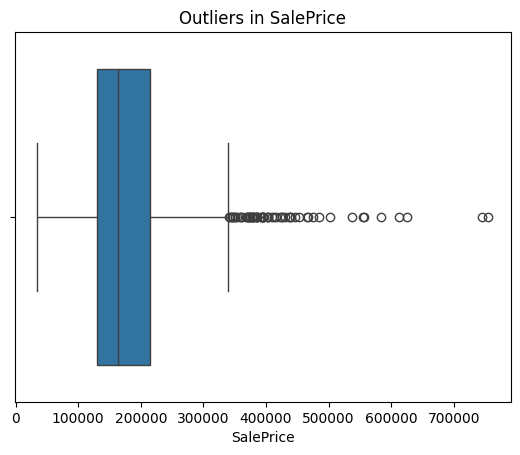

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["SalePrice"])
plt.title("Outliers in SalePrice")
plt.show()


In [13]:
df = df[df["SalePrice"] < 500000]


In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [16]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

# 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    score = rmse(y_val, preds)
    print(f"{name} Validation RMSE: {score:.2f}")


Linear Regression Validation RMSE: 19695.40
Ridge Validation RMSE: 23558.05


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+11, tolerance: 4.403e+08
  model = cd_fast.enet_coordinate_descent(


Lasso Validation RMSE: 19416.12
Random Forest Validation RMSE: 20819.58


In [18]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
test_preds = best_model.predict(X_test)
print("Test RMSE:", rmse(y_test, test_preds))


Test RMSE: 27820.36908906748
